In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering
from sklearn.decomposition import PCA

# Data set Analysis

In [2]:
df = pd.read_csv('DATASET2.csv')

In [3]:
df = df.set_index(['projeto'])

In [4]:
df

alexandria-plsql-utils  apex-plugin-apexscreencapture  \
projeto                                                          
1                           441                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   
5                             2                              0   
6                             5                              0   
7                             9                              0   
8                             0                              0   
9                             0                              0   
10                           22                              2   
11                            0                              0   
12                            0                              0   
13                            0                              0   
14                            0                              0   
15                            1                              0   
16                            0                              0   
17                            1                              0   
18                            0                              0   
19                           58                              0   
20                            6                              0   
21                            0                              0   
22                            0                              0   
23                          964                              0   
24                            0                              0   
25                            0                              0   
26                           24                              0   
27                           15                              0   
28                            0                              0   
29                            0                              0   
30                            0                              0   
31                            1                              0   
32                            0                              0   
33                           26                              0   
34                           20                              0   
35                            0                              0   
36                           13                              0   
37                            0                              0   
38                           13                              0   
39                            0                              0   
40                           20                              0   
41                            1                              0   
42                            0                              0   
43                            0                              0   
44                            0                              0   
45                            0                              0   
46                           30                              0   
47                           40                             11   
48                           44                              0   
49                            0                              0   
50                            2                              0   

         apex-plugin-apextooltip  apex-plugin-templates  dbax-lite  \
projeto                                                              
1                              0                      6         28   
2                              0                      0          0   
3                              0                      0          0   
4                              0                      0          0   
5                              0                      0          0   
6                              0                      0          0   
7               

In [5]:
remove_list = [2, 3, 4, 8, 12,13, 16, 21, 22, 24, 25, 28, 29, 30, 32, 37, 39, 43]
for i in range(len(remove_list)):
    remove_list[i] =  remove_list[i]-1

In [6]:
df = df.drop(df.index[remove_list])

# Clustering Process

In [7]:
km = KMeans(n_clusters=9,random_state=42)
ap = AffinityPropagation(damping=0.5)
agglo = AgglomerativeClustering(n_clusters=9)

In [8]:
km_clf = km.fit(df)
ap_clf = ap.fit(df)
agglo_clf = agglo.fit(df)

In [9]:
ap_labels = ap_clf.labels_
ap_labels

array([0, 3, 3, 1, 3, 2, 3, 3, 7, 3, 3, 4, 7, 5, 3, 7, 3, 1, 6, 3, 3, 3,
       3, 7, 3, 3, 3, 7, 8, 7, 3, 3], dtype=int64)

In [10]:
km_labels = km_clf.labels_
km_labels

array([5, 0, 0, 8, 0, 1, 0, 0, 7, 0, 0, 6, 7, 2, 0, 7, 0, 8, 3, 0, 0, 0,
       0, 7, 0, 0, 0, 7, 4, 7, 0, 0])

In [11]:
agglo_labels = agglo_clf.labels_
agglo_labels

array([4, 0, 0, 1, 0, 7, 0, 0, 2, 0, 0, 8, 2, 5, 0, 2, 0, 1, 6, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 3, 2, 0, 0], dtype=int64)

# Clustering Results

In [12]:
km_results_dict = dict()
ap_results_dict = dict()
agglo_results_dict = dict()

In [13]:
projects_id = list(df.index)

In [14]:
for i in range(len(km_labels)):
    km_results_dict[km_labels[i]] = list()
for i in range(len(km_labels)):
    km_results_dict[km_labels[i]].append(projects_id[i])

In [15]:
km_results_dict

{5: [1],
 0: [5, 6, 9, 11, 14, 17, 18, 26, 31, 35, 36, 38, 40, 42, 44, 45, 49, 50],
 8: [7, 33],
 1: [10],
 7: [15, 20, 27, 41, 46, 48],
 6: [19],
 2: [23],
 3: [34],
 4: [47]}

In [16]:
for i in range(len(ap_labels)):
    ap_results_dict[ap_labels[i]] = list()
for i in range(len(ap_labels)):
    ap_results_dict[ap_labels[i]].append(projects_id[i])

In [17]:
ap_results_dict

{0: [1],
 3: [5, 6, 9, 11, 14, 17, 18, 26, 31, 35, 36, 38, 40, 42, 44, 45, 49, 50],
 1: [7, 33],
 2: [10],
 7: [15, 20, 27, 41, 46, 48],
 4: [19],
 5: [23],
 6: [34],
 8: [47]}

In [18]:
for i in range(len(agglo_labels)):
    agglo_results_dict[agglo_labels[i]] = list()
for i in range(len(agglo_labels)):
    agglo_results_dict[agglo_labels[i]].append(projects_id[i])

In [19]:
agglo_results_dict

{4: [1],
 0: [5, 6, 9, 11, 14, 17, 18, 26, 31, 35, 36, 38, 40, 42, 44, 45, 49, 50],
 1: [7, 33],
 7: [10],
 2: [15, 20, 27, 41, 46, 48],
 8: [19],
 5: [23],
 6: [34],
 3: [47]}

In [20]:
from sklearn.feature_selection import chi2, SelectKBest

In [21]:
df_new = pd.DataFrame(SelectKBest(chi2, k=2).fit_transform(df, agglo_labels))

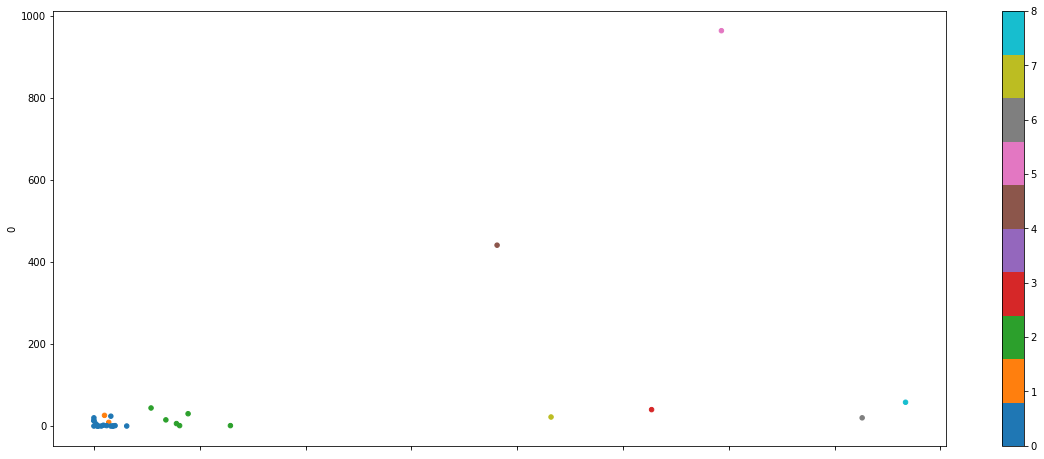

In [22]:
ax = df_new.plot.scatter(1,0,c=agglo_labels,colormap='tab10', figsize=(20, 8))